In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [6]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['5th Grade','2011','5th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,5th Grade,2011,39.0,0.9,-0.2 to 2,81,yellow,39.0,0.0,-0.8 to 0.9,53,yellow,"LOCKE, A CHTR",400011,4730,Charter,5th Grade,2011,89.7,92.3,91.0,30.8,17.9,24.4,59.0,74.4,66.7,10.3,7.7,9.0,0,0.0,0.0,39,39
1,AMANDLA CHTR HS,400012,Southwest Side HS Network,5th Grade,2011,43.1,-0.9,-2 to 0.2,15,yellow,43.1,-0.5,-1.3 to 0.4,33,yellow,AMANDLA CHTR HS,400012,2035,Charter,5th Grade,2011,55.6,58.7,57.1,12.7,0.0,6.3,42.9,58.7,50.8,44.4,36.5,40.5,0,4.8,2.4,63,63
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,5th Grade,2011,41.2,1.2,0.1 to 2.3,89,green,41.2,0.5,-0.3 to 1.3,73,yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,5th Grade,2011,61.7,70.2,66.0,19.1,8.5,13.8,42.6,61.7,52.1,38.3,27.7,33.0,0,2.1,1.1,47,47


In [7]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [8]:
data.shape

(436, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     78.15
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           2.41e-17
Time:                        17:03:25   Log-Likelihood:                -1811.5
No. Observations:                 436   AIC:                             3627.
Df Residuals:                     434   BIC:                             3635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     63.9730      0.740     86.408      0.000        62.518    65.428
x              6.3233      0.715      8.840      0.000         4.917     7.729
==============================================================================
Omnibus:                        2.052   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                2.108
Skew:                           0.136   Prob(JB):                        0.349
Kurtosis:                       2.796   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

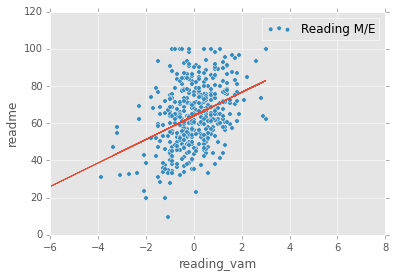

In [9]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     26.05
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           4.99e-07
Time:                        17:03:36   Log-Likelihood:                -1818.8
No. Observations:                 436   AIC:                             3642.
Df Residuals:                     434   BIC:                             3650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.3529      0.753     23.050      0.000        15.873    18.833
x              3.7123      0.727      5.104      0.000         2.283     5.142
==============================================================================
Omnibus:                      238.037   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1447.943
Skew:                           2.365   Prob(JB):                         0.00
Kurtosis:                      10.572   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

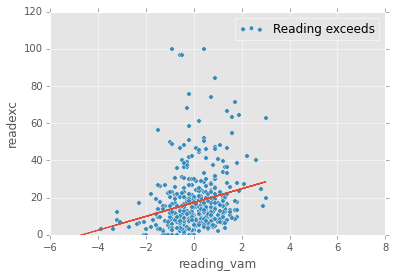

In [10]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading exceeds")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     26.99
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           3.16e-07
Time:                        17:03:42   Log-Likelihood:                -1657.0
No. Observations:                 436   AIC:                             3318.
Df Residuals:                     434   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     46.6193      0.519     89.749      0.000        45.598    47.640
x              2.6070      0.502      5.195      0.000         1.621     3.593
==============================================================================
Omnibus:                       54.375   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.100
Skew:                          -0.652   Prob(JB):                     4.15e-28
Kurtosis:                       5.289   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

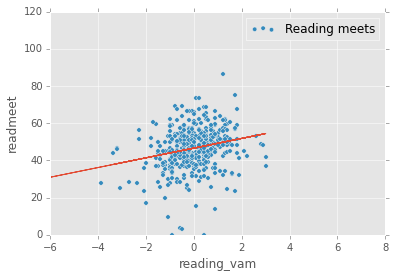

In [11]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading meets")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     72.93
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           2.29e-16
Time:                        17:04:31   Log-Likelihood:                -1801.1
No. Observations:                 436   AIC:                             3606.
Df Residuals:                     434   BIC:                             3614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     35.2522      0.723     48.765      0.000        33.831    36.673
x             -5.9645      0.698     -8.540      0.000        -7.337    -4.592
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.920
Skew:                          -0.101   Prob(JB):                        0.631
Kurtosis:                       2.899   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

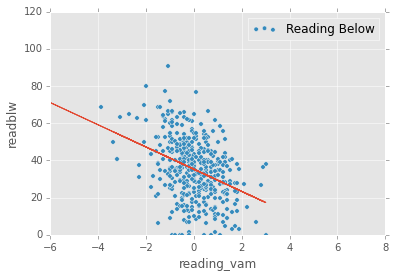

In [14]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     31.61
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           3.39e-08
Time:                        17:04:37   Log-Likelihood:                -756.80
No. Observations:                 436   AIC:                             1518.
Df Residuals:                     434   BIC:                             1526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7748      0.066     11.757      0.000         0.645     0.904
x             -0.3579      0.064     -5.622      0.000        -0.483    -0.233
==============================================================================
Omnibus:                      249.620   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1971.928
Skew:                           2.388   Prob(JB):                         0.00
Kurtosis:                      12.260   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

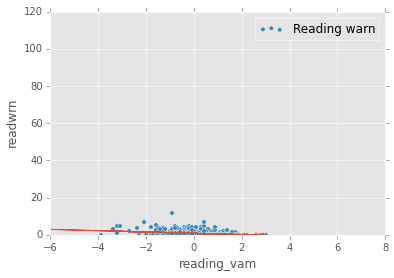

In [15]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading warn")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     30.78
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           5.04e-08
Time:                        17:04:42   Log-Likelihood:                -1765.1
No. Observations:                 436   AIC:                             3534.
Df Residuals:                     434   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     74.8773      0.666    112.489      0.000        73.569    76.186
x              3.5553      0.641      5.548      0.000         2.296     4.815
==============================================================================
Omnibus:                        7.946   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.177
Skew:                          -0.325   Prob(JB):                       0.0168
Kurtosis:                       2.831   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

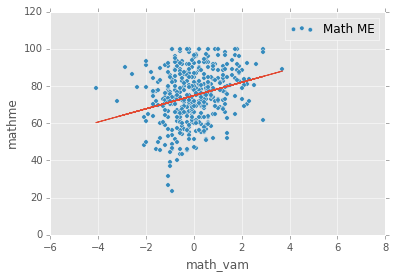

In [16]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()
#print(lm.params.Intercept)
#print(lm.params.x)
#print(lm.params)

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math ME")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     31.34
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           3.84e-08
Time:                        17:04:48   Log-Likelihood:                -1759.7
No. Observations:                 436   AIC:                             3523.
Df Residuals:                     434   BIC:                             3532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.7805      0.657     17.920      0.000        10.488    13.073
x              3.5434      0.633      5.599      0.000         2.299     4.787
==============================================================================
Omnibus:                      243.292   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.842
Skew:                           2.441   Prob(JB):                         0.00
Kurtosis:                      10.510   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

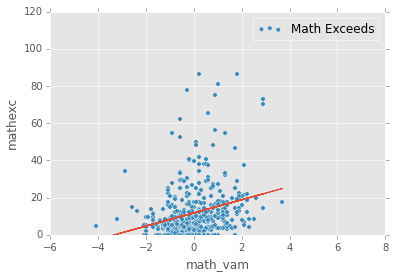

In [17]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 0.0003267
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.986
Time:                        17:04:55   Log-Likelihood:                -1697.1
No. Observations:                 436   AIC:                             3398.
Df Residuals:                     434   BIC:                             3406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     63.0972      0.570    110.785      0.000        61.978    64.217
x              0.0099      0.548      0.018      0.986        -1.068     1.088
==============================================================================
Omnibus:                       72.978   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.821
Skew:                          -0.938   Prob(JB):                     7.17e-31
Kurtosis:                       5.030   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

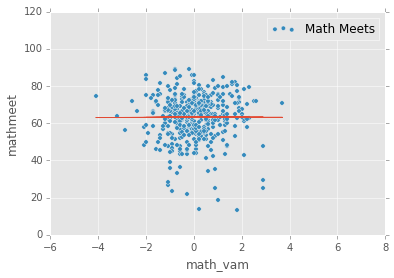

In [18]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     29.08
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           1.14e-07
Time:                        17:05:01   Log-Likelihood:                -1736.7
No. Observations:                 436   AIC:                             3477.
Df Residuals:                     434   BIC:                             3486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.9162      0.624     38.351      0.000        22.691    25.142
x             -3.2375      0.600     -5.392      0.000        -4.418    -2.057
==============================================================================
Omnibus:                       10.310   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.247
Skew:                           0.246   Prob(JB):                       0.0162
Kurtosis:                       2.540   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

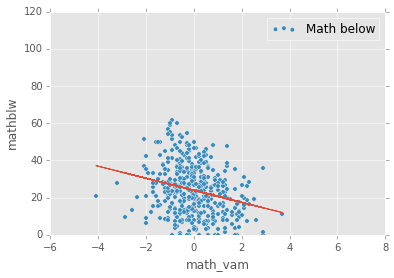

In [19]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math below")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     11.34
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000826
Time:                        17:05:07   Log-Likelihood:                -932.00
No. Observations:                 436   AIC:                             1868.
Df Residuals:                     434   BIC:                             1876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2111      0.098     12.297      0.000         1.017     1.405
x             -0.3193      0.095     -3.367      0.001        -0.506    -0.133
==============================================================================
Omnibus:                      306.979   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3935.579
Skew:                           2.927   Prob(JB):                         0.00
Kurtosis:                      16.504   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

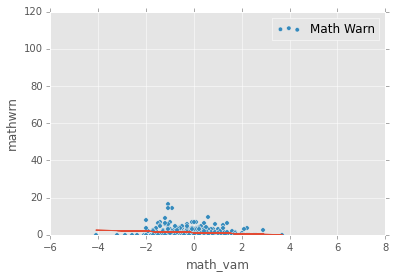

In [20]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.xlim(-6, 8)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()